# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


Wine Histograms


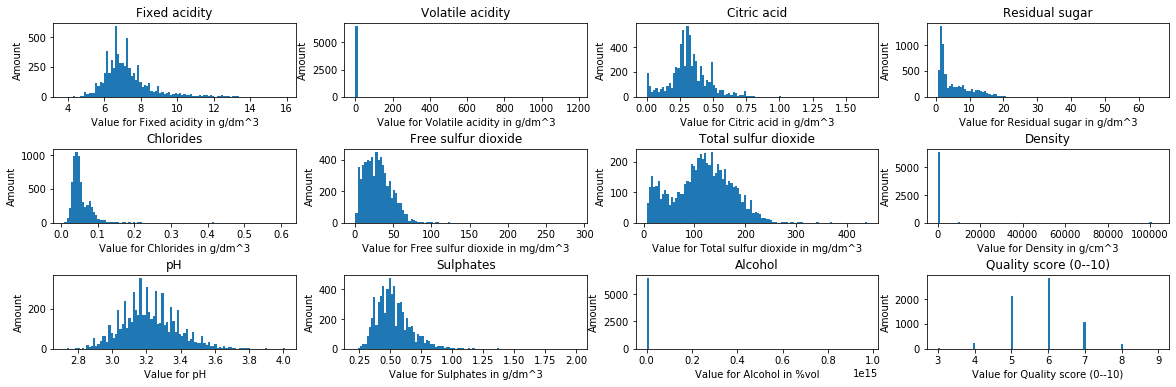

Figure 1: Hisograms for each each wine attribute

Wine Boxplots


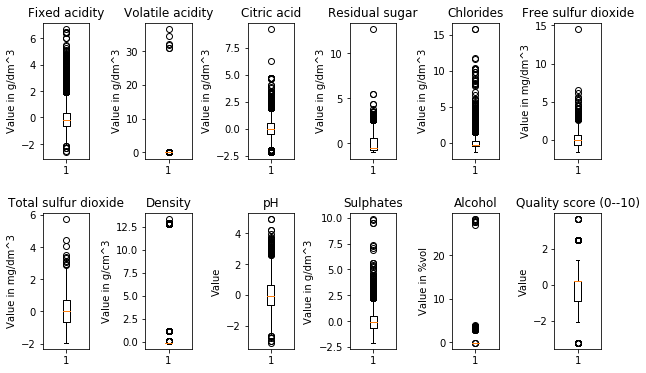

Figure 2: Boxplots for each wine attribute

Wine Histograms without outliers


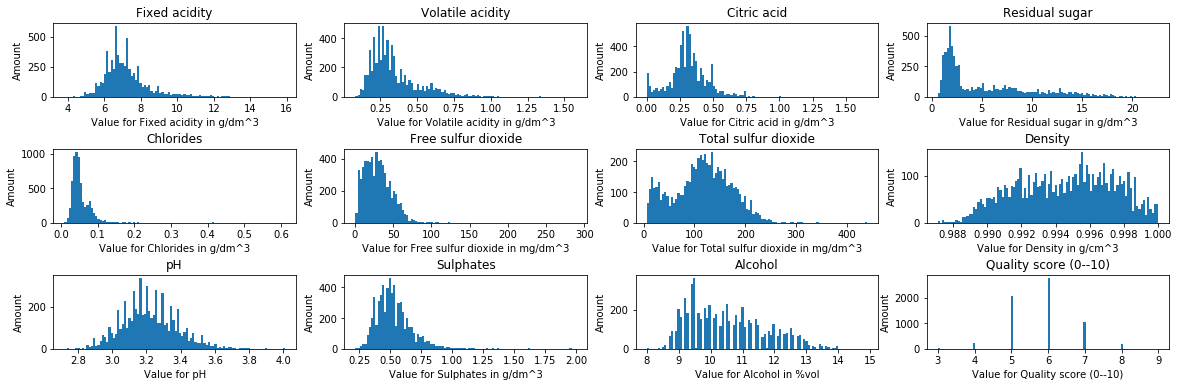

Figure 3: Histograms for each wine attribute after removing outliers

Wine Boxplots without outliers


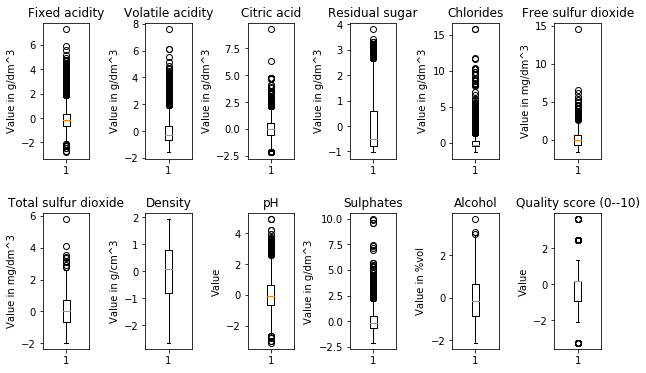

Figure 4: Boxplots for each wine attribute after removing outliers


In [8]:
import scipy as scipy
import scipy.io
import scipy.stats as spst
import numpy as np
import matplotlib.pyplot as plt
data = scipy.io.loadmat('Data/wine')
x = np.array(data['X'])
attributeNames = data['attributeNames']

print("Wine Histograms")
histplt, axs = plt.subplots(3,4)
histplt.set_size_inches(20.0, 6.0)
histplt.subplots_adjust(hspace = 0.7)
axs = axs.ravel()
for i in range(12):
    axs[i].hist(x[:,i], bins = 100)
    axs[i].set_title(attributeNames[0,i][0])
    if i<5 or i==9:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0] + " in g/dm^3")
    if i==5 or i==6:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0] + " in mg/dm^3")
    if i==7:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0] + " in g/cm^3")
    if i==8 or i==11:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0])
    if i==10:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0] + " in %vol")
    axs[i].set_ylabel("Amount")
plt.show()
print("Figure 1: Hisograms for each each wine attribute\n")

print("Wine Boxplots")
boxplt, axs = plt.subplots(2,6)
axs = axs.ravel()
boxplt.set_size_inches(10.0, 6.0)
boxplt.subplots_adjust(wspace = 1.2, hspace = 0.4)
for i in range(12):
    axs[i].boxplot(spst.zscore(x[:,i]))
    axs[i].set_title(attributeNames[0,i][0])
    if i<5 or i==9:
        axs[i].set_ylabel("Value in g/dm^3")
    if i==5 or i==6:
        axs[i].set_ylabel("Value in mg/dm^3")
    if i==7:
        axs[i].set_ylabel("Value in g/cm^3")
    if i==8 or i==11:
        axs[i].set_ylabel("Value")
    if i==10:
        axs[i].set_ylabel("Value in %vol")
plt.show()
print("Figure 2: Boxplots for each wine attribute\n")


b1 = x[:,1]<(2*10)
b2 = x[:,7]<(1*10)
b3 = x[:,10]<(20*10)
boolAr = np.asarray(b1) & np.asarray(b2) & np.asarray(b3)
x_filtered = x[boolAr]

print("Wine Histograms without outliers")
histplt, axs = plt.subplots(3,4)
histplt.set_size_inches(20.0, 6.0)
histplt.subplots_adjust(hspace = 0.7)
axs = axs.ravel()
for i in range(12):
    axs[i].hist(x_filtered[:,i], bins = 100)
    axs[i].set_title(attributeNames[0,i][0])
    if i<5 or i==9:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0] + " in g/dm^3")
    if i==5 or i==6:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0] + " in mg/dm^3")
    if i==7:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0] + " in g/cm^3")
    if i==8 or i==11:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0])
    if i==10:
        axs[i].set_xlabel("Value for " + attributeNames[0,i][0] + " in %vol")
    axs[i].set_ylabel("Amount")
plt.show()
print("Figure 3: Histograms for each wine attribute after removing outliers\n")

print("Wine Boxplots without outliers")
boxplt, axs = plt.subplots(2,6)
axs = axs.ravel()
boxplt.set_size_inches(10.0, 6.0)
boxplt.subplots_adjust(wspace = 1.2, hspace = 0.4)
for i in range(12):
    axs[i].boxplot(spst.zscore(x_filtered[:,i]))
    axs[i].set_title(attributeNames[0,i][0])
    if i<5 or i==9:
        axs[i].set_ylabel("Value in g/dm^3")
    if i==5 or i==6:
        axs[i].set_ylabel("Value in mg/dm^3")
    if i==7:
        axs[i].set_ylabel("Value in g/cm^3")
    if i==8 or i==11:
        axs[i].set_ylabel("Value")
    if i==10:
        axs[i].set_ylabel("Value in %vol")
plt.show()
print("Figure 4: Boxplots for each wine attribute after removing outliers")



----

The main difference between the histograms can actually only be seen in the histograms of volatile acidity, density and alcohol. The other histograms are almost the same. This makes sense, because outliers were removed based on volatile acidity, density and alchol and as can be seen from the first histograms, these are also the only attributes with big outliers (because the first histograms of these attributes have a single bar, which contains almost all data, except for one/a few datapoints: (the outliers) which makes the histogram wide.)
The same also holds for the boxplots, although it is also more clear that removing the outliers had also some influence on the residual sugar. The boxplots with outliers in the first boxplots, can be recognized by the small, nearly invisible, box (for the first to third quartile) and line (for minimum without outliers to maximum without outliers)

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----

According to the announcement on Brightspace the question above can be ignored

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

Wine attributes and quality.


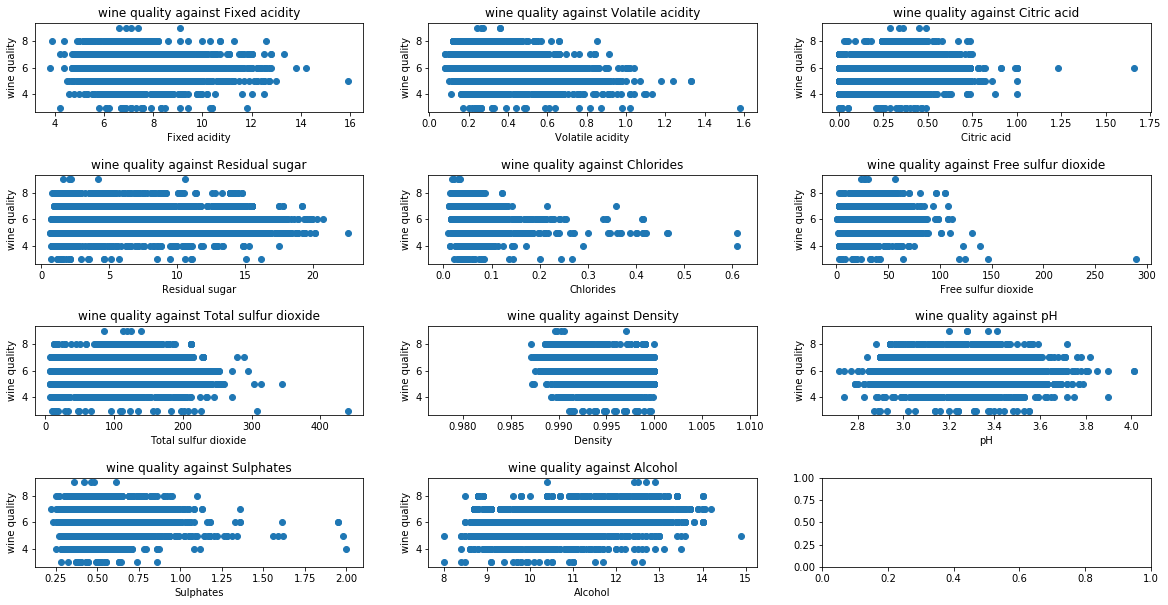

Figure 5: Scatter plots between attributes and wine quality.

correlation coefficients:
correlation coefficient between Fixed acidity and quality: 
-0.07668526520453652
correlation coefficient between Volatile acidity and quality: 
-0.26230590578350776
correlation coefficient between Citric acid and quality: 
0.0890221181546118
correlation coefficient between Residual sugar and quality: 
-0.03215392730963386
correlation coefficient between Chlorides and quality: 
-0.19914164479762572
correlation coefficient between Free sulfur dioxide and quality: 
0.05516006485585848
correlation coefficient between Total sulfur dioxide and quality: 
-0.03971034037910721
correlation coefficient between Density and quality: 
-0.3196176972872714
correlation coefficient between pH and quality: 
0.02030807915814118
correlation coefficient between Sulphates and quality: 
0.03798453783414721
correlation coefficient between Alcohol and quality: 
0.4495415274503276


In [9]:
sctplt, axs = plt.subplots(4,3)
sctplt.set_size_inches(20.0, 10.0)
sctplt.subplots_adjust(hspace = 0.7)
axs = axs.ravel()
values = x_filtered[:,11]
print("Wine attributes and quality.")
for i in range(11):
    indices = x_filtered[:,i]    
    axs[i].scatter(indices, values)
    axs[i].set_title("wine quality against " + attributeNames[0,i][0])
    axs[i].set_ylabel("wine quality")
    axs[i].set_xlabel(attributeNames[0,i][0])
plt.show()
print("Figure 5: Scatter plots between attributes and wine quality.\n")

print("correlation coefficients:")
for i in range(11):
    corr, p = spst.pearsonr(x_filtered[:,i], x_filtered[:,11])
    print("correlation coefficient between " + attributeNames[0,i][0] + " and quality: ")
    print(corr)


As can be seen from the correlation coefficients in the above cell, the attribute that is most associated with high quality wine is the alcohol: a higher percentage, means a higher quality. Also the density, volatile acidity and chlorides are accociated with the quality. For each of these holds, that the lower the value, the higher the quality.
For alcohol and density, this can also be seen from the graphs, for the other attributes this is harder.

----


----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


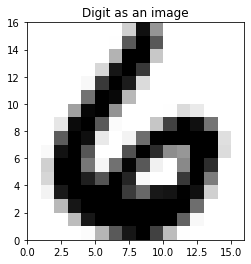

First ten digets


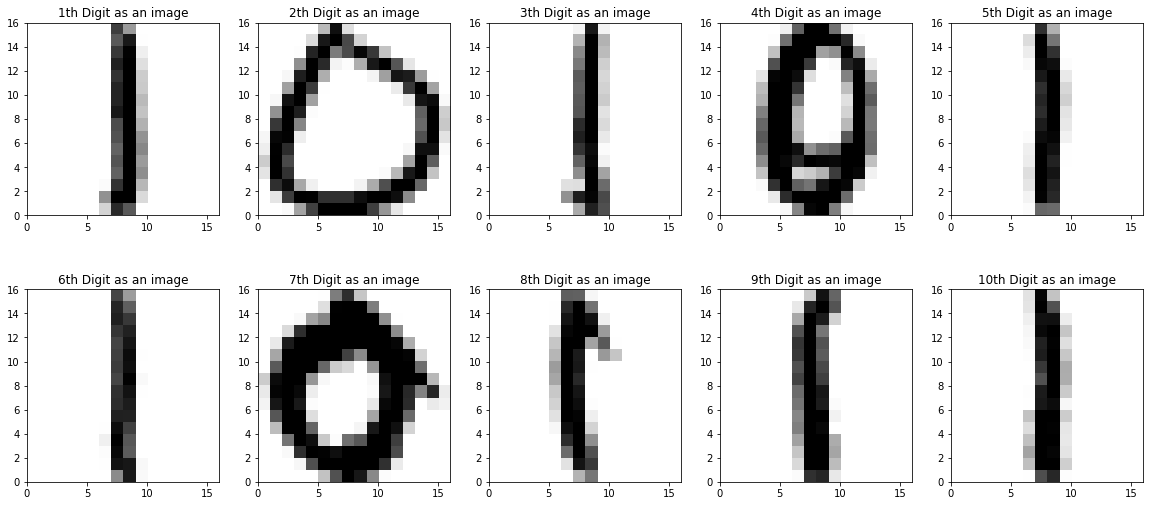

Figure 6: First ten digets shown as images

First ten reconstructed digets


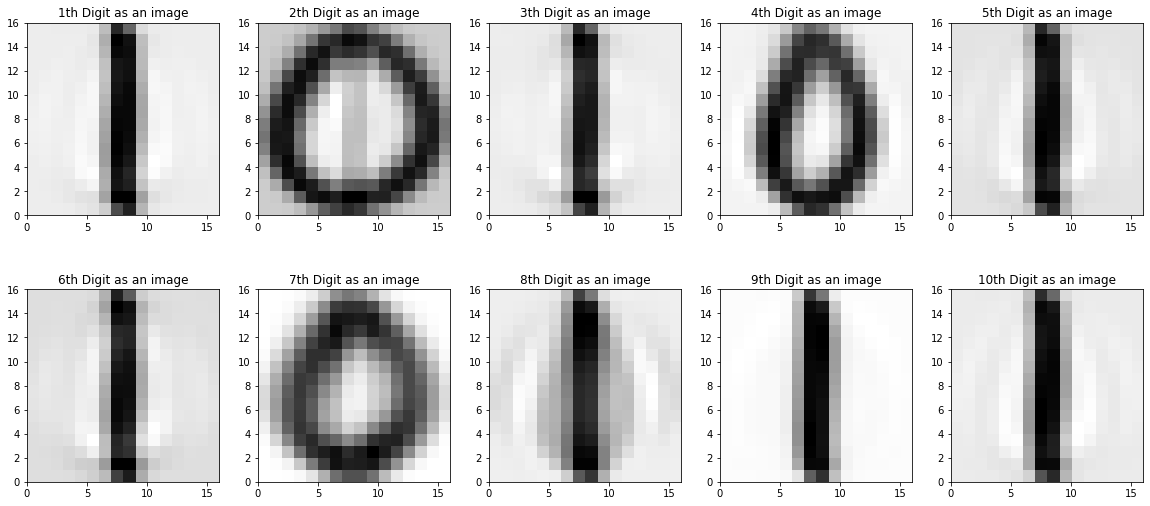

Figure 7: First ten digets shown as images for reconstructed data

PC1 to PC4 against each other


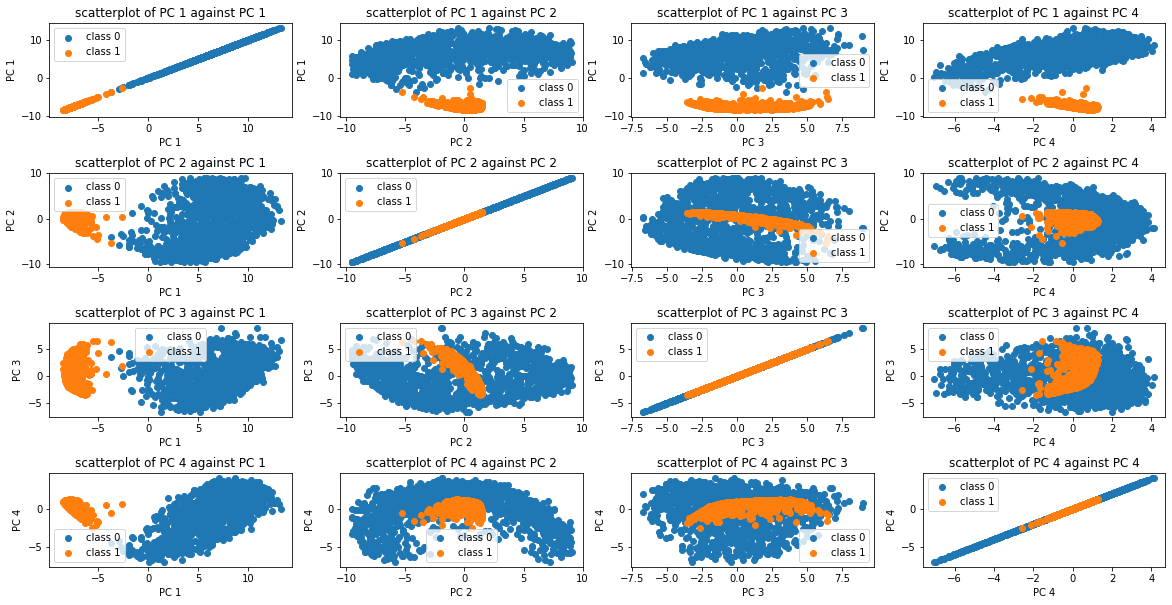

Figure 8: Scatter plots of each possible combination projection onto PC1 to PC4 against each other

3D plot of PC1-PC3


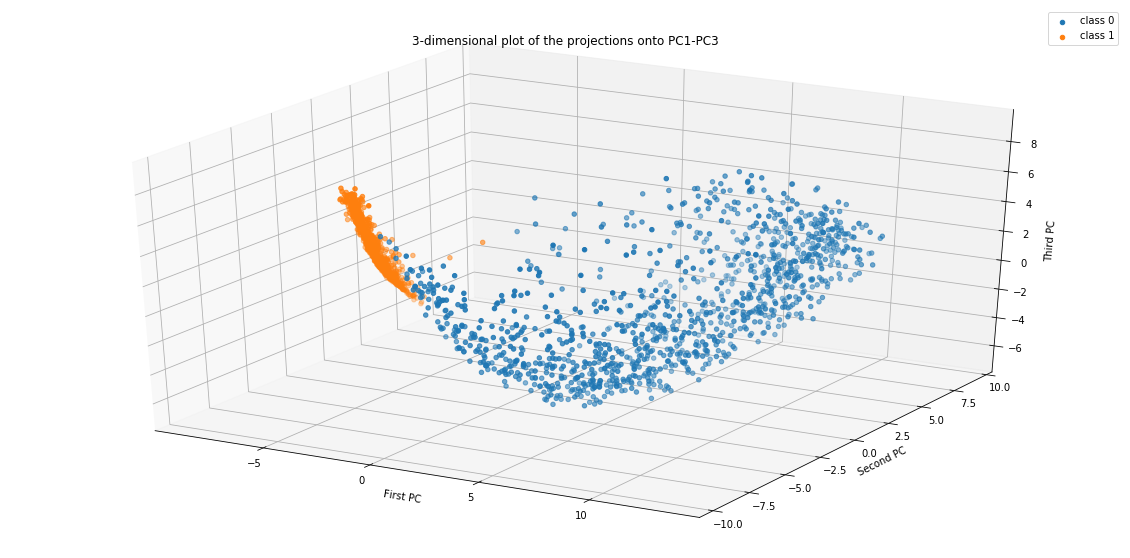

Figure 9: 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3


In [10]:
## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape
from mpl_toolkits import mplot3d

# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Visualize the i'th digit as an image
plt.subplot(1,1,1);
I = reshape(X[i,:],(16,16))
plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
plt.title('Digit as an image');
plt.show()
#------------------------------------------------

b = y<2
X_filtered = X[b]

plt1, axs = plt.subplots(2,5)
plt1.set_size_inches(20.0, 9.0)
plt1.subplots_adjust(hspace = 0.2)
axs = axs.ravel()
print("First ten digets")
for i in range(10):
    I = reshape(X_filtered[i,:],(16,16))
    axs[i].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    axs[i].set_title(str(i+1) + "th Digit as an image")
plt.show()
print("Figure 6: First ten digets shown as images\n")
    
µ = np.mean(X_filtered, axis=0)
Y = np.subtract(X_filtered, µ)
U, S, Vt = np.linalg.svd(Y)
Z = np.dot(Y, np.transpose(Vt)[:,:4])

W = np.dot(Z, np.transpose(np.transpose(Vt)[:,:4]))+µ
plt3, axs = plt.subplots(2,5)
plt3.set_size_inches(20.0, 9.0)
plt3.subplots_adjust(hspace = 0.2)
axs = axs.ravel()
print("First ten reconstructed digets")
for i in range(10):
    I = reshape(W[i,:],(16,16))
    axs[i].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    axs[i].set_title(str(i+1) + "th Digit as an image")
plt.show()
print("Figure 7: First ten digets shown as images for reconstructed data\n")


plt4, axs = plt.subplots(4,4)
plt4.set_size_inches(20.0, 10.0)
plt4.subplots_adjust(hspace = 0.6)
axs = axs.ravel()
y2 = y[b]
b1 = y2==0
b2 = y2==1
print("PC1 to PC4 against each other")
for i in range(16):
    axs[i].scatter((Z[b1])[:,(i%4)], (Z[b1])[:,(i//4)], label=("class 0"))
    axs[i].scatter((Z[b2])[:,(i%4)], (Z[b2])[:,(i//4)], label=("class 1"))
    axs[i].set_title("scatterplot of PC " + str(i//4+1) + " against PC " + str(i%4+1))
    axs[i].set_xlabel("PC " + str(i%4+1))
    axs[i].set_ylabel("PC " + str(i//4+1))
    axs[i].legend()
plt.show()
print("Figure 8: Scatter plots of each possible combination projection onto PC1 to PC4 against each other\n")

print("3D plot of PC1-PC3")
fig = plt.figure()
fig.set_size_inches(20.0, 10.0)
ax = plt.axes(projection='3d')
ax.scatter3D((Z[b1])[:,0], (Z[b1])[:,1], (Z[b1])[:,2], label=("class 0"))
ax.scatter3D((Z[b2])[:,0], (Z[b2])[:,1], (Z[b2])[:,2], label=("class 1"))
ax.legend()
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
ax.set_title('3-dimensional plot of the projections onto PC1-PC3')
plt.show()
print("Figure 9: 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3")


----

What can you conclude from the various scatterplots about the PCs and the way they separate the data?
From the scatterplots of the PCs against each other, it can be seen that the classes form seperate groups in a plot with PC 1 on one of the axes, while in the other plots the classes are overlapping. This can also be seen in the 3D plot, which shows that class 0 mostly differs from class 1 in first PC position and not so much in second or third PC. So the first PC indeed contains the most variance (and thus information) of the data and every higher PC contains less variance/information. This means that on the first PC it is most likely to see a distinction between classes and that on the last/highest PC there would be almost no distinciton between classes.

----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [11]:
a = np.array([2,3,6,8,11,18])
m = np.ndarray.mean(a)
print(m)
stdev = np.ndarray.std(a)
print(stdev)

8.0
5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [12]:
import itertools

twoAlienSamples = list(itertools.combinations(a,2))
print (twoAlienSamples)
twoAlienSamplesMeans = [np.mean(x) for x in twoAlienSamples]
print (twoAlienSamplesMeans)
print()
fourAlienSamples = list(itertools.combinations(a,4))
print (fourAlienSamples)
fourAlienSamplesMeans = [np.mean(x) for x in fourAlienSamples]
print (fourAlienSamplesMeans)

[(2, 3), (2, 6), (2, 8), (2, 11), (2, 18), (3, 6), (3, 8), (3, 11), (3, 18), (6, 8), (6, 11), (6, 18), (8, 11), (8, 18), (11, 18)]
[2.5, 4.0, 5.0, 6.5, 10.0, 4.5, 5.5, 7.0, 10.5, 7.0, 8.5, 12.0, 9.5, 13.0, 14.5]

[(2, 3, 6, 8), (2, 3, 6, 11), (2, 3, 6, 18), (2, 3, 8, 11), (2, 3, 8, 18), (2, 3, 11, 18), (2, 6, 8, 11), (2, 6, 8, 18), (2, 6, 11, 18), (2, 8, 11, 18), (3, 6, 8, 11), (3, 6, 8, 18), (3, 6, 11, 18), (3, 8, 11, 18), (6, 8, 11, 18)]
[4.75, 5.5, 7.25, 6.0, 7.75, 8.5, 6.75, 8.5, 9.25, 9.75, 7.0, 8.75, 9.5, 10.0, 10.75]


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [13]:
m2 = np.mean(twoAlienSamplesMeans)
print(m2)
stdev2 = np.std(twoAlienSamplesMeans)
print(stdev2)
m4 = np.mean(fourAlienSamplesMeans)
print(m4)
stdev4 = np.std(fourAlienSamplesMeans)
print(stdev4)

8.0
3.40587727318528
8.0
1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

----

I) The mean of the sample means and the mean of the population are all the same: 8.0

II) population standard deviation is: 5.385164807134504

    𝜎2 = 3.40587727318528   𝜎/√N = 5.385164807134504/√2 = 3,808 
                        
                        𝜎/√N x √((M-N)/(M-1)) = 5.385164807134504/√2 x √(4/5) = 3,40587727318528

    𝜎4 = 1.70293863659264   𝜎/√N = 5.385164807134504/√4 = 2,693 
                        
                        𝜎/√N x √((M-N)/(M-1)) = 5.385164807134504/√4 x √(2/5) = 1,70293863659264

With this formula 𝜎/√N the result is a bit different from 𝜎x, but 𝜎/√N x √((M-N)/(M-1)) works perfectly. 


----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

Histograms of population and both sample means


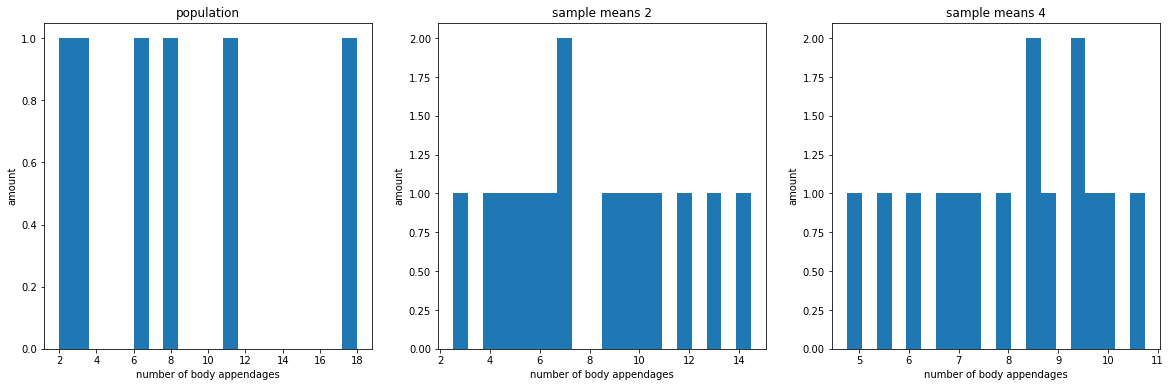

Figure 10: Distribution of the population and the distributions of both sample means using histograms.


In [14]:
print("Histograms of population and both sample means")
histplt, axs = plt.subplots(1,3)
histplt.set_size_inches(20.0, 6.0)
histplt.subplots_adjust(hspace = 0.5)
axs = axs.ravel()
axs[0].hist(a, bins = 20)
axs[0].set_title("population")
axs[1].hist(twoAlienSamplesMeans, bins = 20)
axs[1].set_title("sample means 2")
axs[2].hist(fourAlienSamplesMeans, bins = 20)
axs[2].set_title("sample means 4")
for i in range(3):
    axs[i].set_ylabel("amount")
    axs[i].set_xlabel("number of body appendages")
plt.show()
print("Figure 10: Distribution of the population and the distributions of both sample means using histograms.")

----

What happens to the shape of the sample means distribution as the sample size (N*) increases?
The shape of the sample means distribution gets narrower and sharper as N increases. So it approaches the shape of a normal distribution.

----